In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [2]:

data=pd.read_csv('C:\\Users\\user\\Desktop\\Assignment1\\liver_patient.csv')
#Returns first 5 rows of the dataset
data.head()
#Provides Summary Statistics
#data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Number of patients with Liver Disease:  416
Number of patients without Liver Disease:  167
Number of patients that are male:  441
Number of patients that are female:  142


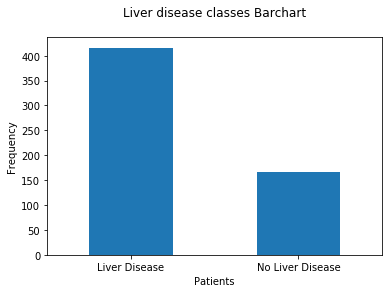

In [3]:
# checking the stats
# given in the website 416 liver disease patients and 167 non liver disease patients
# need to remap the classes liver disease:=1 and no liver disease:=0 (normal convention to be followed)

count_classes = pd.value_counts(data['Diagnosis'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes Barchart\n")
plt.xlabel("Patients")
plt.xticks(np.arange(2), ('Liver Disease','No Liver Disease'), rotation='horizontal')
plt.ylabel("Frequency")

withLiverDisease,withoutLiverDisease= data['Diagnosis'].value_counts()
print('Number of patients with Liver Disease: ',withLiverDisease)
print('Number of patients without Liver Disease: ',withoutLiverDisease)

no_of_male, no_of_female = data['Gender'].value_counts()
print('Number of patients that are male: ',no_of_male)
print('Number of patients that are female: ',no_of_female)

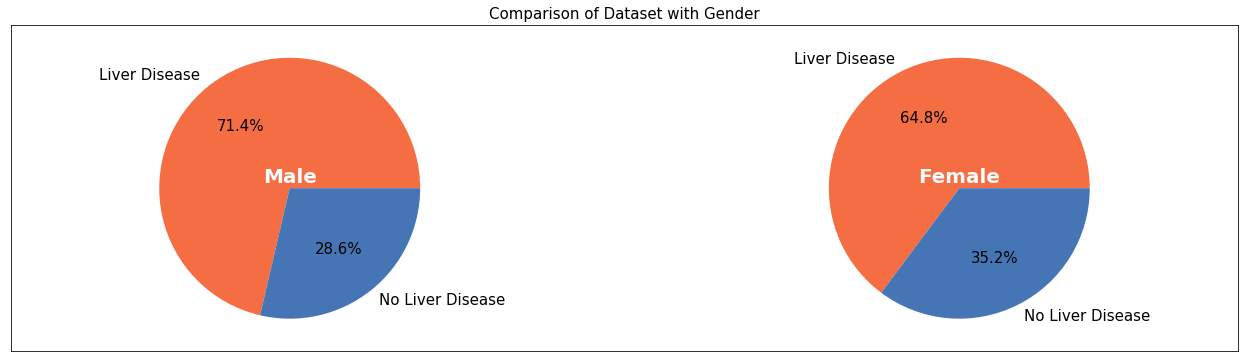

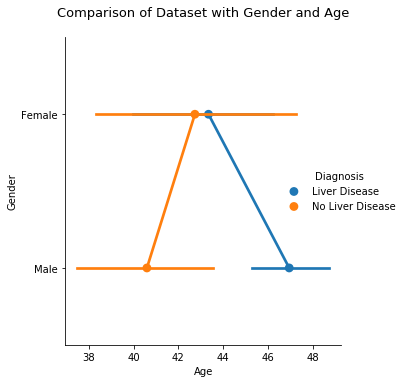

In [4]:

fig= plt.figure(figsize=(22,6))
plt.title("Comparison of Dataset with Gender",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks
axM = fig.add_subplot(121)
axF = fig.add_subplot(122)


with_disease = data[data['Diagnosis']==1]
not_with_disease = data[data['Diagnosis']==2]

with_disease_m = with_disease[with_disease['Gender']=='Male']
with_disease_m = with_disease['Gender']
not_with_disease_m = not_with_disease[not_with_disease['Gender']=='Male']
not_with_disease_m = not_with_disease['Gender']

with_disease_f = with_disease[with_disease['Gender']=='Female']
not_with_disease_f = not_with_disease[not_with_disease['Gender']=='Female']

#==============Note that these are the important variables for piechart==

no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)

no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)

#Note that these two arrays are going to be used in ax1 and ax2
#d_vs_healthy_m is the male array that holds the count for liver disease and no liver disease
#d_vs_healthy_f is the female array that holds the count for liver disease and no liver disease
d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]
#=========================================================================
axM.axis('equal')
axF.axis('equal')
# Plotting the pie chart for male and female with respect to diagnosis
wedges, texts, autotexts = axM.pie(d_vs_healthy_m, 
                                  labels=('Liver Disease','No Liver Disease'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

wedges2, texts2, autotexts2 = axF.pie(d_vs_healthy_f, 
                                  labels=('Liver Disease','No Liver Disease'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

#Configuring the size of the font
plt.setp(autotexts,size=15)
plt.setp(texts,size=15)

plt.setp(autotexts2,size=15)
plt.setp(texts2,size=15)

axM.text(0,0.04,'Male',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')
axF.text(0,0.04,'Female',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')

comparisonPieChart=sns.catplot (x="Age", y="Gender", hue="Diagnosis", data=data, legend_out = True ,kind="point",fit_reg=False );
comparisonPieChart._legend.set_title("Diagnosis")
diagnosis_labels = ['Liver Disease', 'No Liver Disease']
for t, l in zip(comparisonPieChart._legend.texts, diagnosis_labels): t.set_text(l)
plt.title("Comparison of Dataset with Gender and Age\n",loc='center',weight=10,size=13)
plt.show()    


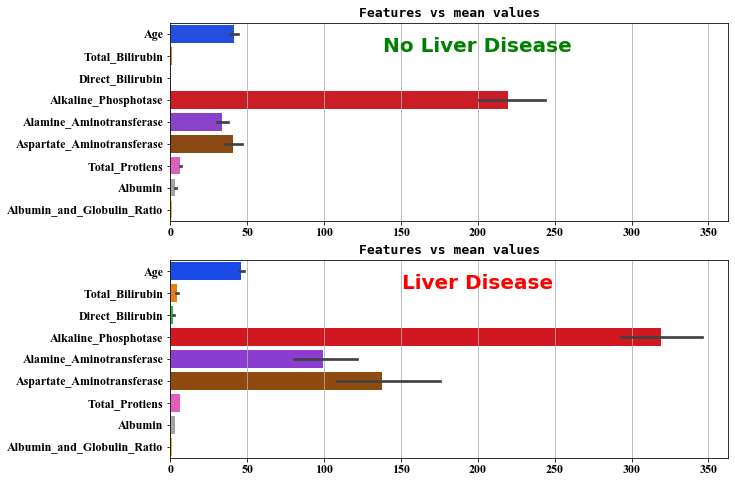

In [5]:
# Without Liver disease (original dataset had it labelled as 2 and not 0)
withoutLiverDiseaseData = data[data['Diagnosis']==2] 
withoutLiverDiseaseData = withoutLiverDiseaseData.iloc[:,:-1]

# With Liver disease
withLiverDiseaseData = data[data['Diagnosis']==1] 
withLiverDiseaseData = withLiverDiseaseData.iloc[:,:-1]

#Boundary for the entire plotted graphs
fig = plt.figure(figsize=(10,8))

#Consider two axises as frames for each bar chart
axNLD = fig.add_subplot(211)
axLD = fig.add_subplot(212,sharex=axNLD)

axNLD.grid()
axLD.grid()

axNLD.set_title('Features vs mean values',fontsize=13,weight='bold',family='monospace')
axNLD.text(200,0.8,'No Liver Disease',fontsize=20,horizontalalignment='center',color='green',weight='bold')


axLD.set_title('Features vs mean values',fontsize=13,weight='bold',family='monospace')
axLD.text(200,0.8,'Liver Disease',fontsize=20,horizontalalignment='center',color='red',weight='bold')

# for axis ax1
plt.sca(axNLD)
plt.xticks(rotation = 0, 
           family='Times New Roman',
           size='large')
plt.yticks( weight='bold', 
           family='Times New Roman',
           size='large')
# for axis ax2
plt.sca(axLD)
plt.xticks(rotation = 0, 
            family='Times New Roman',
           size='large')
plt.yticks( weight='bold', 
             family='Times New Roman',
           size='large')

# sns.set_style('whitegrid')

sns.barplot(data=withoutLiverDiseaseData,ax=axNLD,orient='horizontal', palette='bright') # no liver disease
sns.barplot(data=withLiverDiseaseData,ax=axLD,orient='horizontal',palette='bright',saturation=0.80) # with liver disease

In [6]:
data['Diagnosis'] = data['Diagnosis'].map({2:0,1:1}) 
# data['Diagnosis'].value_counts()

In [7]:
#filled in the missing values with zeros for column Albumin_and_Globulin_Ratio
data['Albumin_and_Globulin_Ratio'].fillna(value=0, inplace=True)

#We are removing the column Gender and Diagnosis to only contain features
data_features=data.drop(['Diagnosis'],axis=1)
#We are removing the column  Diagnosis to only contain features and gender since it is not numerical feature
data_num_features=data.drop(['Gender','Diagnosis'],axis=1)
data_num_features.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(data_num_features.columns)
data_features_scaled=pd.DataFrame(data=data_features)
data_features_scaled[cols]=scaler.fit_transform(data_features[cols])
#data_features_scaled.head()
data_exp=pd.get_dummies(data_features_scaled)
data_exp.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.123797,1,0
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.612077,0,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.154315,0,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.181378,0,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.649672,0,1


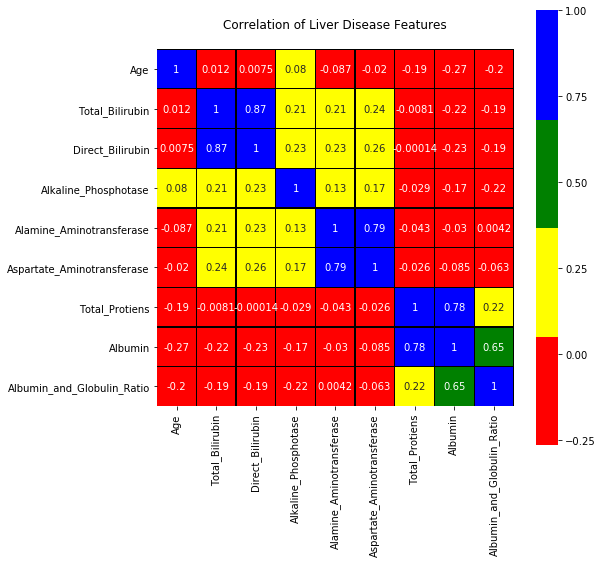

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Correlation of Liver Disease Features\n')
# Draw the heatmap using seaborn
sns.heatmap(data_num_features.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, 
            cmap=ListedColormap(['red', 'yellow', 'green','blue']), linecolor='black',annot=True)


Comparison of correlated variables with gender and diagnosis



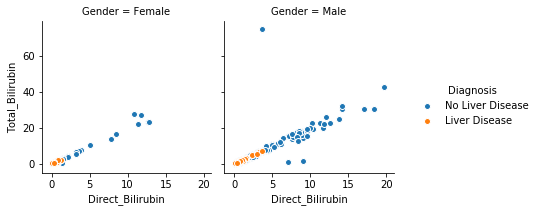

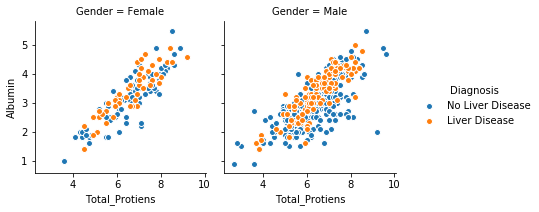

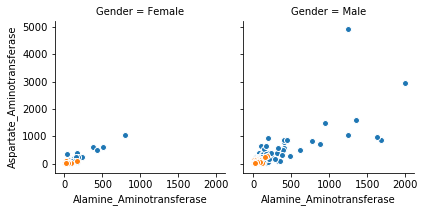

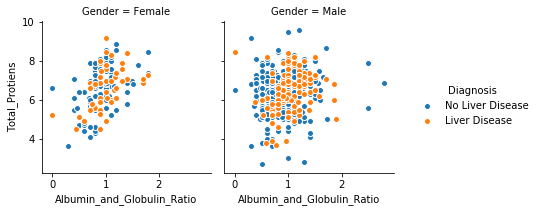

In [10]:
#Scatter Diagrams based on correlated variables that shows comparsion according to gender and diagnosis
print("Comparison of correlated variables with gender and diagnosis\n")

data['Diagnosis'] = data['Diagnosis'].map({1:'No Liver Disease',0:'Liver Disease'}) 
scatter = sns.FacetGrid(data, col="Gender", hue="Diagnosis", margin_titles=True)
scatter.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w").add_legend()
plt.subplots_adjust(top=0.9)

scatter = sns.FacetGrid(data, col="Gender", hue="Diagnosis", margin_titles=True)
scatter.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w").add_legend()
plt.subplots_adjust(top=0.9)

scatter = sns.FacetGrid(data, col="Gender", hue="Diagnosis", margin_titles=True)
scatter.map(plt.scatter,"Alamine_Aminotransferase", "Aspartate_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

scatter = sns.FacetGrid(data, col="Gender", hue="Diagnosis", margin_titles=True)
scatter.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w").add_legend()
plt.subplots_adjust(top=0.9)

In [11]:
# to split train and test set
from sklearn.model_selection import train_test_split
data['Diagnosis'] = data['Diagnosis'].map({'No Liver Disease':1,'Liver Disease':0}) 
#data_exp is feature  importances as our x coordinate
X=data_exp
# Diagnois the target as our y coordinate
Y=data['Diagnosis'] 
# 70 % for testing and 30% for training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, 
                                                    random_state=1234,
                                                    stratify=data.Diagnosis)

Confuse Matrix for target variable Diagnosis


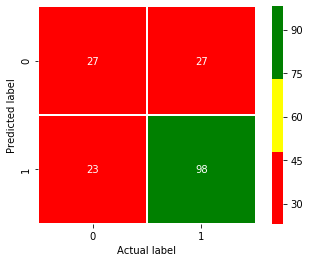

In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix


# n_estimators=number of trees you want to build before taking the maximum voting or averages of predictions
#min_samples_split=minimum number of samples required to split an internal node
#min_samples_leaf=The minimum number of samples required to be at a leaf node.
hyperparams = {'n_estimators': [100,200,300,400,500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), hyperparams, n_iter=15, scoring = 'roc_auc', n_jobs=-1,cv=5)


from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=60)
os_features,os_labels=oversampler.fit_sample(X_train,Y_train)
bestModel=model.fit(os_features,os_labels)

#Predicted value of our Training dataset
Y_train_pred =bestModel.best_estimator_.predict(X_train)
#Predicted value of our Testing training dataset
Y_pred = bestModel.best_estimator_.predict(X_test)
# Get just the prediction for the positive class (1)
Y_pred_proba = bestModel.best_estimator_.predict_proba(X_test)[:,1]




print("Confuse Matrix for target variable Diagnosis")
print(59*'=')
confuseMatrix=confusion_matrix(Y_test, Y_pred)
sns.heatmap(confuseMatrix.T, square=True, annot=True, fmt='d',lw=1,cmap=ListedColormap(['red','yellow','green']))
plt.xlabel('Actual label')
plt.ylabel('Predicted label');

In [13]:
from sklearn import metrics
print("Classification Report")
print(60*'=')
print(metrics.classification_report(Y_pred,Y_test))
print(60*'=')

Classification Report
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        54
           1       0.78      0.81      0.80       121

    accuracy                           0.71       175
   macro avg       0.66      0.65      0.66       175
weighted avg       0.71      0.71      0.71       175



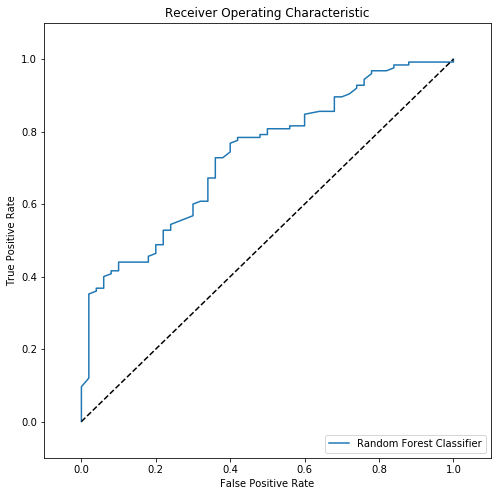

Accuracy of the Testing dataset: 1.0
Accuracy of the Training dataset: 0.7341600000000001


In [14]:

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Calculate AUC for Train set
print("Accuracy of the Testing dataset: "+str(roc_auc_score(Y_train, Y_train_pred)))

# Calculate AUC for Test set
print("Accuracy of the Training dataset: "+str(auc(fpr, tpr)))

In [15]:
# View the important features using the feature_importances_ 
# Get numerical feature importances
 
feature_list = list(data_features_scaled.columns) 
importances = list(bestModel.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nThe features in order of Importance are:")
 #We are generating - at the quantity of 90 for the line
print(90*'=')
#We are using {} to create spacing and we can specify the width of the spacing
[print('Variable: {:60} Importance: {}'.format(*pair)) for pair in feature_importances];


The features in order of Importance are:
Variable: Alamine_Aminotransferase                                     Importance: 0.15
Variable: Gender                                                       Importance: 0.13
Variable: Total_Bilirubin                                              Importance: 0.13
Variable: Direct_Bilirubin                                             Importance: 0.12
Variable: Alkaline_Phosphotase                                         Importance: 0.12
Variable: Age                                                          Importance: 0.1
Variable: Albumin                                                      Importance: 0.08
Variable: Aspartate_Aminotransferase                                   Importance: 0.07
Variable: Total_Protiens                                               Importance: 0.07
Variable: Albumin_and_Globulin_Ratio                                   Importance: 0.01


C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


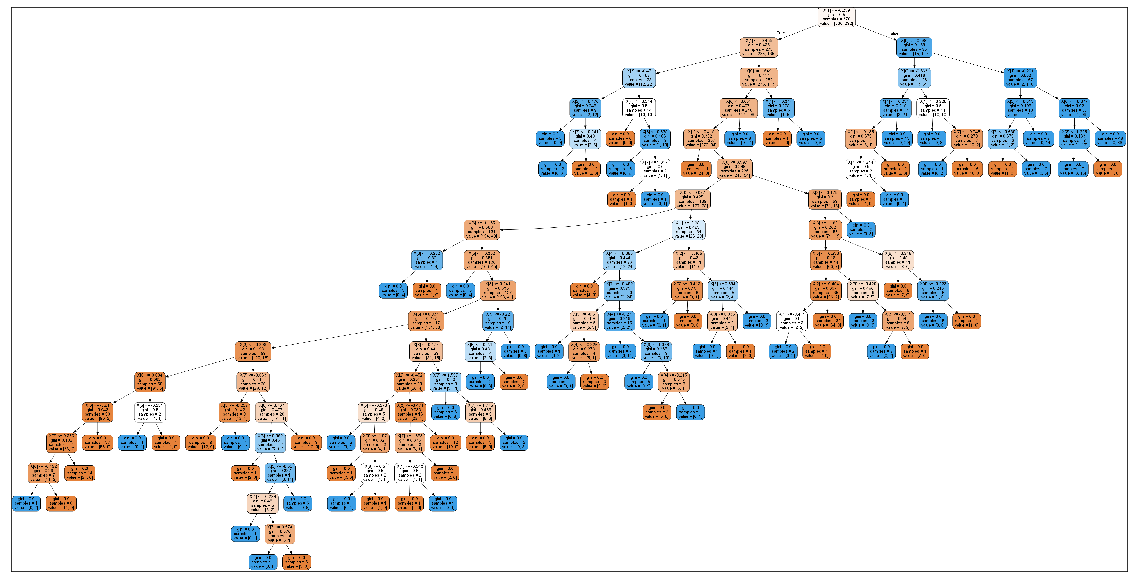

In [16]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import pydotplus
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
import io                                                                                                                                                                                                                                  

#feature_list=list(data_exp.columns) 
dTree=bestModel.best_estimator_.estimators_[50]

dot_data = io.StringIO()

export_graphviz(dTree, out_file=dot_data, rounded=True, filled=True)

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)
                                                 
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
img = mpimg.imread(filename)
imgplot = plt.imshow(img)